In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
zoopla = pd.read_csv('ZooplaGLA.csv')
airbnb = pd.read_csv('cleaned data airbnb.csv')

## Visualisation

1. Number of data for each step

In [43]:
d = {'step':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],'zoopla': [13826, 8943, 7196, 7064, 7064, 7064, 6793, 6780, 6771, 6771],'airbnb': [7911, 7911, 6760, 6760, 6760, 6583, 6332, 4399, 4399, 4398]}
step_number = pd.DataFrame(data=d)
step_number

,step,zoopla,airbnb
0,0,13826,7911
1,1,8943,7911
2,2,7196,6760
3,3,7064,6760
4,4,7064,6760
5,5,7064,6583
6,6,6793,6332
7,7,6780,4399
8,8,6771,4399
9,9,6771,4398


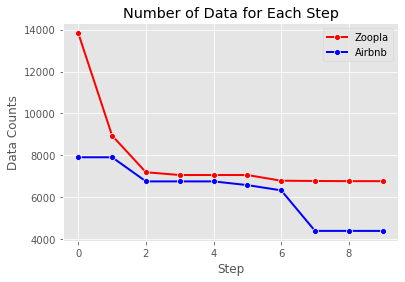

In [54]:
from matplotlib.pyplot import MultipleLocator

x = step_number['step']
y_z = step_number['zoopla']
y_a = step_number['airbnb']
ax1 = sns.lineplot(x, y_z, linewidth=2, color='red', marker='o', label = 'Zoopla')
ax2 = sns.lineplot(x, y_a, linewidth=2, color='blue', marker='o', label = 'Airbnb')

plt.xlabel("Step")
plt.ylabel("Data Counts")
plt.title("Number of Data for Each Step")

plt.show()

2. Property type bar chart

In [48]:
property_type_z = zoopla.property_type.value_counts().rename_axis('property_type').reset_index(name='counts')
print(property_type_z)
property_type_a = airbnb.property.value_counts().rename_axis('property_type').reset_index(name='counts')
print(property_type_a)

  property_type  counts
0          Flat    6360
1         House     217
2        Studio     137
3    Maisonette      32
4       Cottage      18
5      Bungalow       7
  property_type  counts
0          Flat    3921
1         House     335
2        Studio     105
3    Maisonette      19
4      Bungalow      13
5       Cottage       5


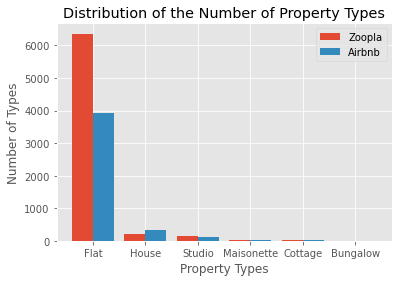

In [58]:
x = property_type_z['property_type']
y1 = property_type_z['counts']
y2 = property_type_a['counts']

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label = 'Zoopla')
plt.bar(x_axis + 0.2, y2, 0.4, label = 'Airbnb')

plt.xticks(x_axis, x)
plt.xlabel("Property Types")
plt.ylabel("Number of Types")
plt.title("Distribution of the Number of Property Types")
plt.legend()
plt.show()

3. Word Count Violin Chart

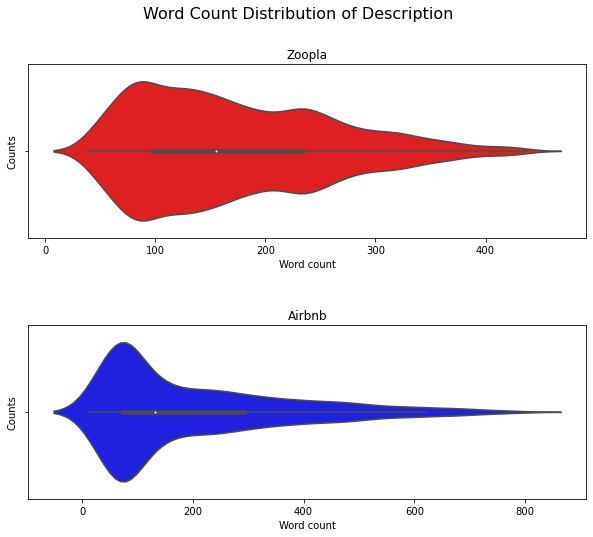

In [3]:
plt.figure(1, figsize=(10,8))
plt.suptitle("Word Count Distribution of Description", fontsize=16)

ax = plt.subplot(211)
ax.set_title("Zoopla")
#ax.set_xlabel('Percent of Population in Census Block')
#ax.set_ylabel('Number of Census Blocks')
sns.violinplot(x = zoopla["word_count"], color='red')
plt.xlabel("Word count")
plt.ylabel("Counts")

ax = plt.subplot(212)
ax.set_title("Airbnb")
#ax.set_xlabel('Percent of Population in Census Block')
#ax.set_ylabel('Number of Census Blocks')
sns.violinplot(x = airbnb["word_count"],color='blue')
plt.xlabel("Word count")
plt.ylabel("Counts")

plt.subplots_adjust(hspace=.5)
plt.show()

In [4]:
print(zoopla['word_count'].describe())
print(airbnb['word_count'].describe())

count    6771.000000
mean      172.321961
std        88.551531
min        38.000000
25%        98.000000
50%       155.000000
75%       234.000000
max       438.000000
Name: word_count, dtype: float64
count    4398.000000
mean      201.886767
std       172.865654
min        13.000000
25%        74.000000
50%       131.000000
75%       293.000000
max       800.000000
Name: word_count, dtype: float64


## Distrbiution

In [3]:
boundary = gpd.read_file('GlasgowBdry_2011.shp')

In [4]:
zoopla_point = gpd.GeoDataFrame(zoopla, geometry=gpd.points_from_xy(zoopla.lon, zoopla.lat),crs=4326)
zoopla_point = zoopla_point.to_crs(27700)

airbnb_point = gpd.GeoDataFrame(airbnb,geometry = gpd.points_from_xy(airbnb.lng,airbnb.lat),crs =4326)
airbnb_point = airbnb_point.to_crs(27700)

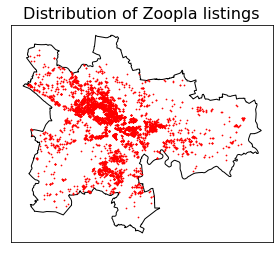

In [5]:
base = boundary.plot(color='white', edgecolor='black')
zoopla_point.plot(ax=base, marker='o', color='red', markersize=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Distribution of Zoopla listings', fontsize=16)
plt.savefig('zoopla discription.png',dpi=450)
plt.show()

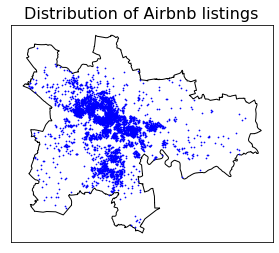

In [6]:
base = boundary.plot(color='white', edgecolor='black')
airbnb_point.plot(ax=base, marker='o', color='blue', markersize=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Distribution of Airbnb listings', fontsize=16)
plt.savefig('airbnb discription.png',dpi=450)
plt.show()